# Zadanie domowe: wizualizacja poziomu zanieczyszczeń

Główny Inspektorat Ochrony Środowiska udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl/pjp/archives](https://powietrze.gios.gov.pl/pjp/archives), w tym stężenia pyłów PM2,5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas dane dotyczące zanieczyszczenia pyłami drobnymi PM2,5 (o średnicy poniżej 2,5 mikrometra) ze zbioru danych "Statystyki z lat 2000-2023", ale ograniczonego do lat od 2010 do 2023 oraz pomiarów 24-godzinnych (kolumna 'Czas uśredniania' == '24g'). Resztę danych pomijamy. Zadanie polega na przygotowaniu notatnika z wykresami, które będą przedstawiać wizualizacje danych o 24-godzinnych średnich stężeniach PM2,5 na przestrzeni lat w różnych województwach. Do każdego wykresu należy obowiązkowo dodać 1-2 zdania podsumowujące przedstawione wyniki. Każda analiza powinna zawierać przynajmniej 3 rysunki:

- Wykres liniowy przedstawiający zmianę średniego stężenia PM2,5 w czasie dla dwóch wybranych stacji pomiarowych. Proszę dobrać stacje w taki sposób aby zakres pomiarów pokrywał pełen okres 2010-2023.
- Wykres pudełkowy przedstawiający rozkład średnich stężeń PM2,5 dla wszystkich stacji pomiarowych w Polsce (oś y) z podziałem na poszczególne lata (oś x).
- Wykres słupkowy porównujący między województwami liczbę przekroczeń normy stężenia PM2,5 (np. 25 µg/m³ według WHO) w latach 2010-2023. Należy wykonać i porównać dwa wykresy: jeden podający sumaryczną liczbę przekroczeń na wszystkich stacjach pomiarowych (łącznie) w poszczególnych województwach a drugi podający procent pomiarów z przekroczoną normą (t.j. liczba przekroczeń znormalizowana liczbą pomiarów). 

Można wykorzystać dowolne poznane biblioteki do wizualizacji danych w Pythonie.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("zadanie9_dane.xlsx", sheet_name="PM2,5")
df = df.drop(index=0).reset_index(drop=True)
df = df[(df['Rok'] >= 2010) & (df['Rok'] <= 2024)]
df = df[df['Czas uśredniania'] == '24g']

In [26]:
df

,Rok,Województwo,Kod strefy,Nazwa strefy,Kod stacji,Wskaźnik,Czas uśredniania,Średnia,Min,Maks,Liczba pomiarów,Kompletność,Liczba Lato/Zima
68,2010,dolnośląskie,PL0201,Aglomeracja Wrocławska,DsWrocNaGrob,PM2.5,24g,31.917891,0.155,202,338,92.6,1.08
70,2010,dolnośląskie,PL0201,Aglomeracja Wrocławska,DsWrocWybCon,PM2.5,24g,37.649151,4.5,214.4,364,99.72,1.01
71,2010,dolnośląskie,PL0202,miasto Legnica,DsLegAlRzecz,PM2.5,24g,30.791925,5,218,321,87.94,1.12
72,2010,dolnośląskie,PL0203,miasto Wałbrzych,DsWalbrzWyso,PM2.5,24g,27.912426,2,156,338,92.6,1.17
73,2010,dolnośląskie,PL0204,strefa dolnośląska,DsOsieczow21,PM2.5,24g,17.471042,2,126,258,70.68,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2023,wielkopolskie,PL3003,strefa wielkopolska,WpPleszAlMic,PM2.5,24g,19.149107,1.9,161.6,336,92.05,1
1662,2023,zachodniopomorskie,PL3201,aglomeracja szczecińska,ZpSzczAndrze,PM2.5,24g,10.539178,1.8,63.9,365,100,1.01
1664,2023,zachodniopomorskie,PL3202,miasto Koszalin,ZpKoszSpasow,PM2.5,24g,11.168219,2,33.6,365,100,1.01
1665,2023,zachodniopomorskie,PL3203,strefa zachodniopomorska,ZpMyslZaBram,PM2.5,24g,14.984022,2,92.4,363,99.45,1.01


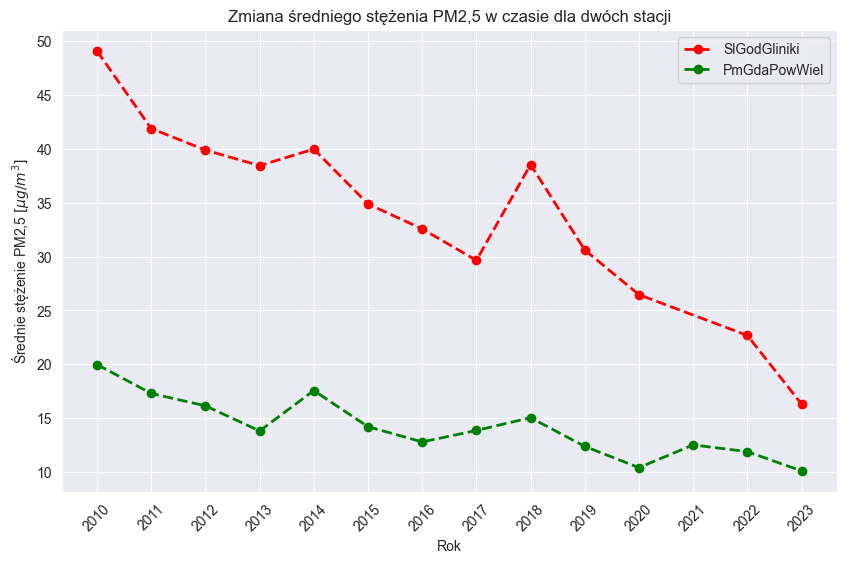

In [64]:
stacja1 = "SlGodGliniki"
stacja2 = "PmGdaPowWiel"
data_stacja1 = df[df['Kod stacji'] == stacja1]
data_stacja2 = df[df['Kod stacji'] == stacja2]

plt.show()
plt.figure(figsize=(10, 6))
plt.plot(data_stacja1['Rok'], data_stacja1['Średnia'], label=stacja1, color='red', linestyle='dashed', linewidth=2, marker='o')
plt.plot(data_stacja2['Rok'], data_stacja2['Średnia'], label=stacja2,  color='green', linestyle='dashed', linewidth=2, marker='o')
plt.xlabel('Rok')
plt.ylabel(r'Średnie stężenie PM2,5 $[\mu g/m^3]$')
plt.title('Zmiana średniego stężenia PM2,5 w czasie dla dwóch stacji')
plt.legend()
plt.grid(True)
plt.xticks(range(2010, 2024))
plt.xticks(rotation=45)
plt.show()

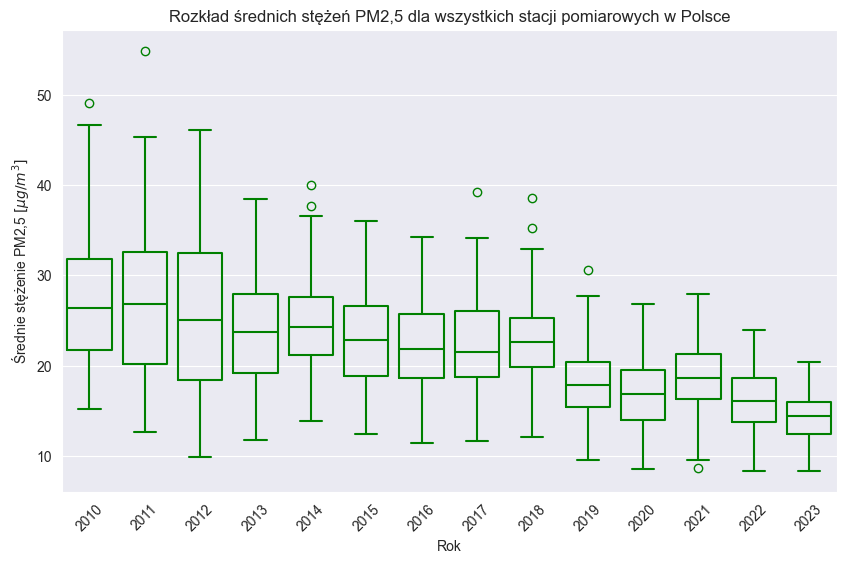

In [59]:
data_boxplot = df.groupby(['Rok', 'Kod stacji'])['Średnia'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rok', y='Średnia', data=data_boxplot, fill=False, color='g')
plt.xlabel('Rok')
plt.ylabel('Średnie stężenie PM2,5 $[\mu g/m^3]$')
plt.title('Rozkład średnich stężeń PM2,5 dla wszystkich stacji pomiarowych w Polsce')
plt.xticks(rotation=45)
plt.show()

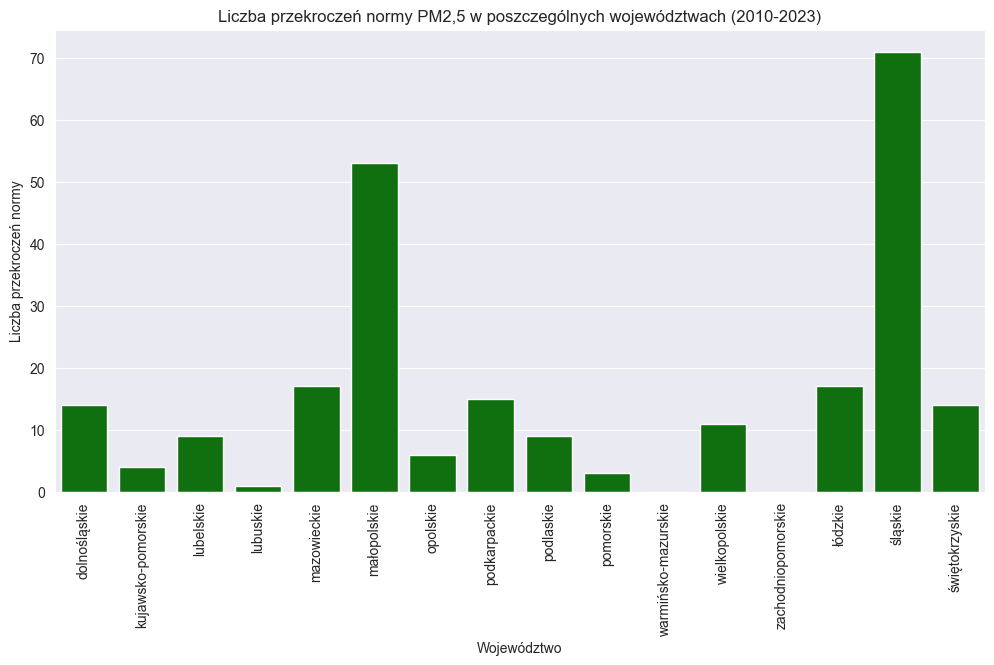

In [77]:
who_norm = 25

df['Przekroczenie'] = df['Średnia'] > who_norm

przekroczenie_wojewodztwa = df.groupby(['Województwo'])['Przekroczenie'].sum().reset_index()

# Wykres słupkowy
plt.figure(figsize=(12, 6))
sns.barplot(x='Województwo', y='Przekroczenie', data=przekroczenie_wojewodztwa, color='green')
plt.xlabel('Województwo')
plt.ylabel('Liczba przekroczeń normy')
plt.title('Liczba przekroczeń normy PM2,5 w poszczególnych województwach (2010-2023)')
plt.xticks(rotation=90)
plt.show()

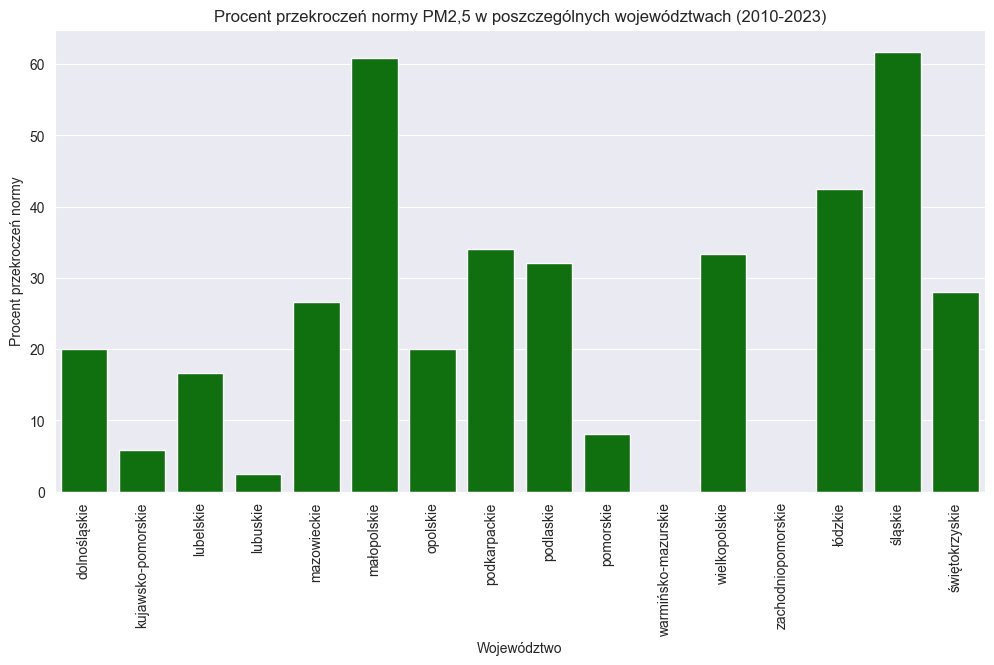

In [78]:
who_norm = 25

df['Przekroczenie'] = df['Średnia'] > who_norm

przekroczenie_wojewodztwa_procent = df.groupby(['Województwo'])['Przekroczenie'].mean().reset_index()
przekroczenie_wojewodztwa_procent['Przekroczenie'] *= 100
# Wykres słupkowy
plt.figure(figsize=(12, 6))
sns.barplot(x='Województwo', y='Przekroczenie', data=przekroczenie_wojewodztwa_procent, color='green')
plt.xlabel('Województwo')
plt.ylabel('Procent przekroczeń normy')
plt.title('Procent przekroczeń normy PM2,5 w poszczególnych województwach (2010-2023)')
plt.xticks(rotation=90)
plt.show()